<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier González Paredes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

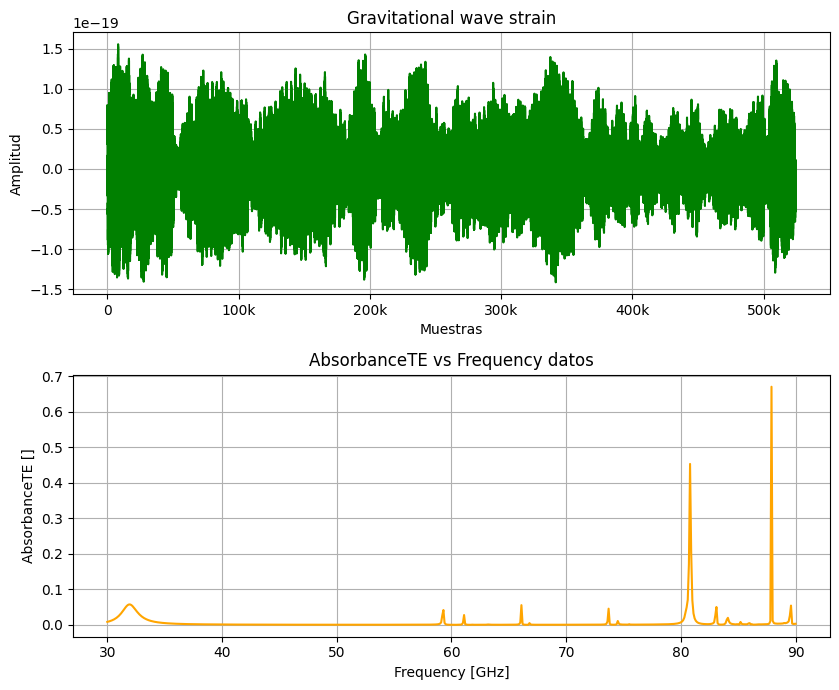

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo de texto
file_path_txt = 'H-H1_GWOSC_16KHZ_R1-1268431079-32.txt'
with open(file_path_txt, 'r') as file:
    # Leer las líneas del archivo y omitir las líneas que comienzan con #
    lines_txt = [line.strip() for line in file if not line.startswith('#')]

# Convertir los datos de cadena a números flotantes
data_txt = [float(line) for line in lines_txt]

# Leer el archivo CSV
file_path_csv = 'AbsorbanceTE_0-0.csv'
data_csv = pd.read_csv(file_path_csv)

# Crear subgráficos
fig, axs = plt.subplots(2, figsize=(8.5, 7))

# Graficar datos del archivo de texto en el primer subgráfico
axs[0].plot(data_txt, color="green")
axs[0].set_title('Gravitational wave strain')
axs[0].set_xlabel('Muestras')
axs[0].set_ylabel('Amplitud')
axs[0].set_xticks([0, 100000, 200000, 300000, 400000, 500000])
axs[0].set_xticklabels(['0', '100k', '200k', '300k', '400k', '500k'])
axs[0].grid(True)

# Graficar datos del archivo CSV en el segundo subgráfico
axs[1].plot(data_csv['Freq [GHz]'], data_csv['AbsorbanceTE []'], color="orange")
axs[1].set_title('AbsorbanceTE vs Frequency datos')
axs[1].set_xlabel('Frequency [GHz]')
axs[1].set_ylabel('AbsorbanceTE []')
axs[1].grid(True)

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()


## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


La señal continua que se utilizará se puede expresar mediante la siguiente ecuación:
$$ f(x) = A \cdot \sin(\omega_1 \cdot x + \phi_1) + B \cdot \cos(\omega_2 \cdot x + \phi_2) + C \cdot e^{ax}

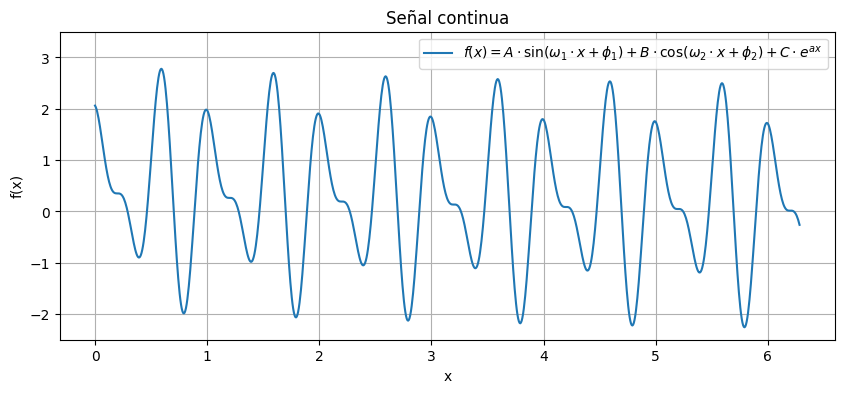

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1.5
omega_1 = 2 * np.pi * 2
phi_1 = np.pi / 4
B = 1.0
omega_2 = 2 * np.pi * 3
phi_2 = np.pi / 3
C = 0.5
a = -0.2

# Datos de la señal
x = np.linspace(0, 2 * np.pi, 1000)
y = A * np.sin(omega_1 * x + phi_1) + B * np.cos(omega_2 * x + phi_2) + C * np.exp(a * x)

# Grafica de la señal
plt.figure(figsize=(10, 4))
plt.plot(x, y, label=r'$f(x) = A \cdot \sin(\omega_1 \cdot x + \phi_1) + B \cdot \cos(\omega_2 \cdot x + \phi_2) + C \cdot e^{ax}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Señal continua')
plt.legend()
plt.ylim(-2.5, 3.5)
plt.grid(True)
plt.show()


## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

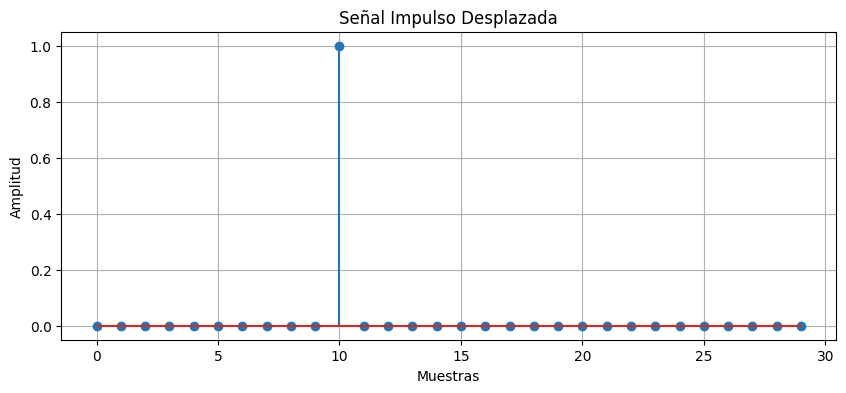

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una señal impulso (delta) desplazada
def delta_signal(shift, length):
    signal = np.zeros(length)
    signal[shift] = 1
    return signal

# Parámetros de la señal
shift = 10  # Desplazamiento
length = 30  # Longitud de la señal

# Crear la señal impulso desplazada
impulse_signal = delta_signal(shift, length)

# Graficar la señal impulso
plt.figure(figsize=(10, 4))
plt.stem(impulse_signal)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal Impulso Desplazada')
plt.grid(True)
plt.show()


### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


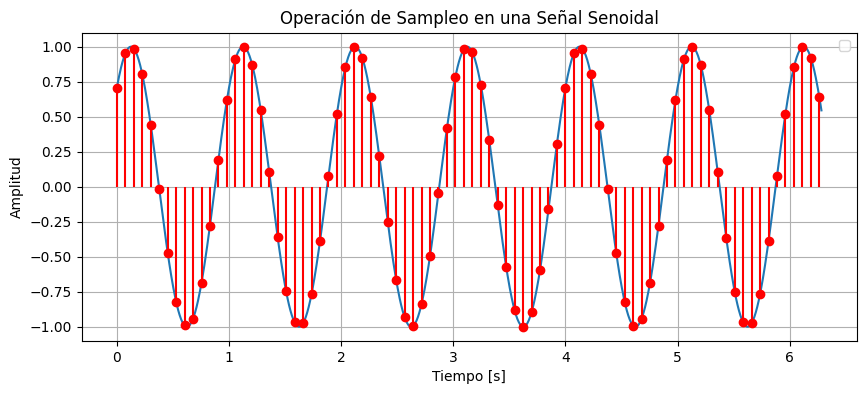

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal senoidal
amplitud = 1.0
frecuencia = 1  # en Hz
fase = np.pi / 4

# Parámetros de muestreo
frecuencia_muestreo = 80  # en Hz
periodo_muestreo = 1 / frecuencia_muestreo

# Crear la señal senoidal
t = np.linspace(0, 2 * np.pi, 1000)
senoidal = amplitud * np.sin(2 * np.pi * frecuencia * t + fase)

# Muestrear la señal senoidal
muestras_idx = np.arange(0, len(t), int(periodo_muestreo * len(t)))
muestras_tiempo = t[muestras_idx]
muestras_valor = senoidal[muestras_idx]

# Graficar la señal senoidal
plt.figure(figsize=(10, 4))
plt.plot(t, senoidal)
plt.stem(muestras_tiempo, muestras_valor, 'r', markerfmt='ro', basefmt=" ")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Operación de Sampleo en una Señal Senoidal')
plt.legend()
plt.grid(True)
plt.show()


### 3.3 Genere una señal Triangular y realice la operación de sampleo

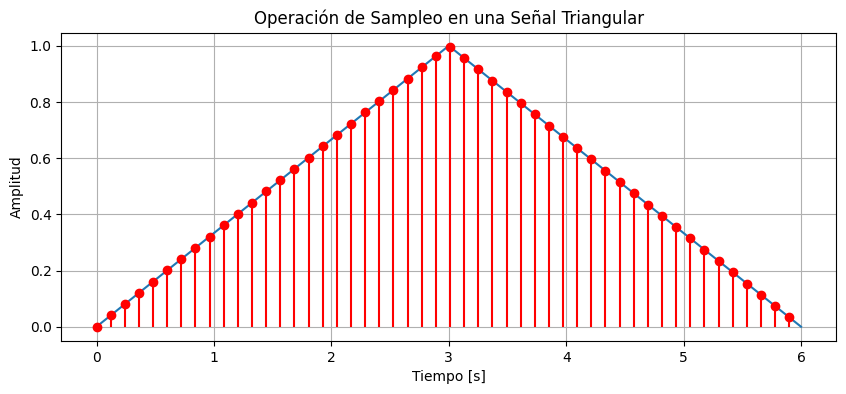

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal triangular
amplitud = 1.0
frecuencia = 1  # en Hz
fase = np.pi / 4

# Parámetros de muestreo
frecuencia_muestreo = 50  # en Hz
duracion = 6  # Duración en segundos
periodo_muestreo = 1 / frecuencia_muestreo

# Crear el tiempo para la señal triangular
t = np.linspace(0, duracion, int(frecuencia_muestreo * duracion))

# Crear la señal triangular
triangular = amplitud * (2 * np.abs((t / duracion - np.floor(t / duracion + 0.5))))

# Muestrear la señal triangular
muestras_idx = np.arange(0, len(t), int(periodo_muestreo * len(t)))
muestras_tiempo = t[muestras_idx]
muestras_valor = triangular[muestras_idx]

# Graficar la señal triangular
plt.figure(figsize=(10, 4))
plt.plot(t, triangular)
plt.stem(muestras_tiempo, muestras_valor, 'r', markerfmt='ro', basefmt=" ")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Operación de Sampleo en una Señal Triangular')
plt.grid(True)
plt.show()


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

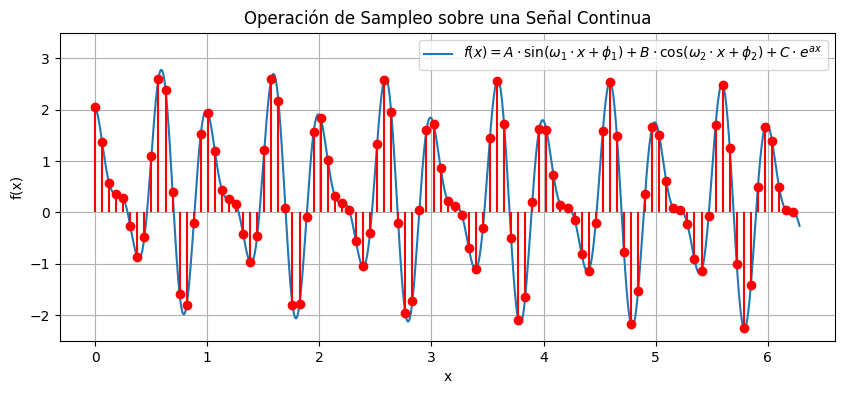

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1.5
omega_1 = 2 * np.pi * 2
phi_1 = np.pi / 4
B = 1.0
omega_2 = 2 * np.pi * 3
phi_2 = np.pi / 3
C = 0.5
a = -0.2

# Datos de la señal
x = np.linspace(0, 2 * np.pi, 1000)
y = A * np.sin(omega_1 * x + phi_1) + B * np.cos(omega_2 * x + phi_2) + C * np.exp(a * x)

# Parámetros de muestreo
frecuencia_muestreo = 100  # Hz
periodo_muestreo = 1 / frecuencia_muestreo

# Muestrear la señal
muestras_idx = np.arange(0, len(x), int(periodo_muestreo * len(x)))
muestras_tiempo = x[muestras_idx]
muestras_valor = y[muestras_idx]

# Grafica de la señal continua
plt.figure(figsize=(10, 4))
plt.plot(x, y, label=r'$f(x) = A \cdot \sin(\omega_1 \cdot x + \phi_1) + B \cdot \cos(\omega_2 \cdot x + \phi_2) + C \cdot e^{ax}$')
plt.stem(muestras_tiempo, muestras_valor, 'r', markerfmt='ro', basefmt=" ")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Operación de Sampleo sobre una Señal Continua')
plt.legend()
plt.ylim(-2.5, 3.5)
plt.grid(True)
plt.show()


### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax. 

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

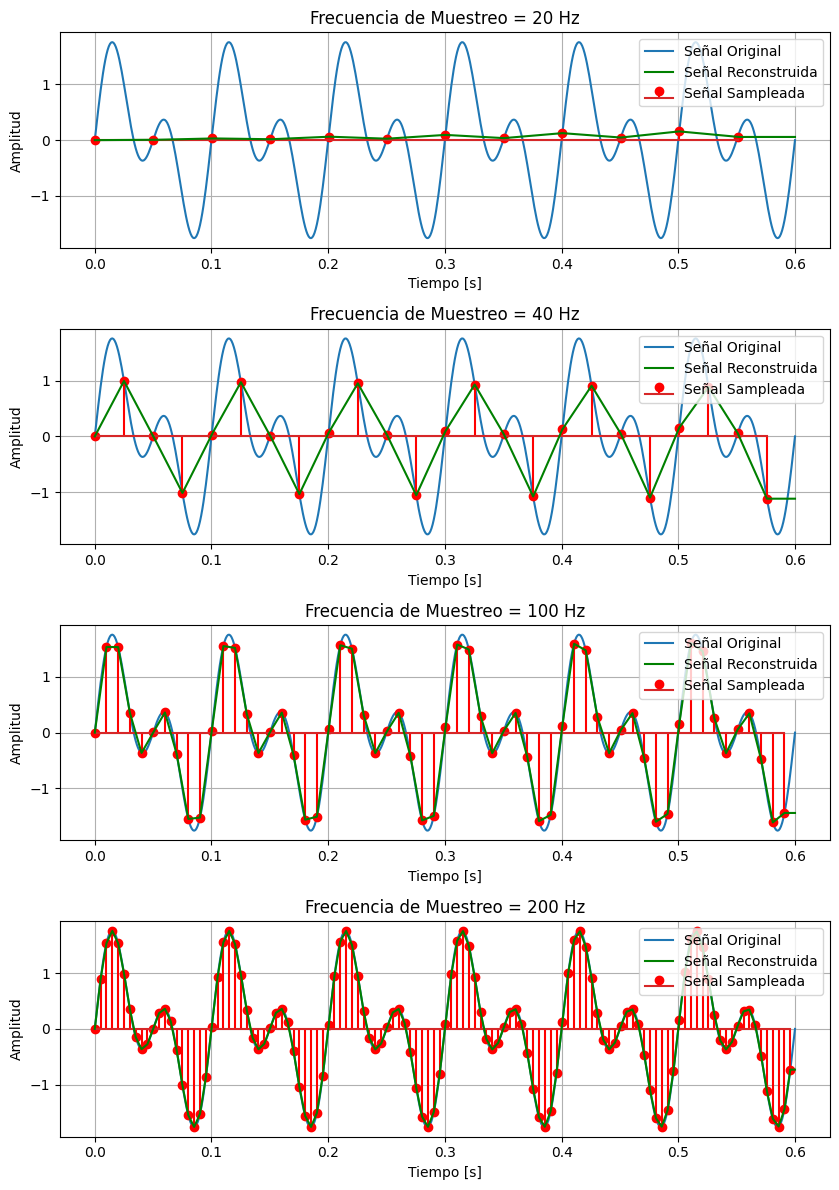

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Definir una señal con una frecuencia máxima Fmax
def signal(x):
    return np.sin(2 * np.pi * 10 * x) + np.sin(2 * np.pi * 20 * x)

# Definir los parámetros
duracion = 0.6  # Duración en segundos
frecuencia_maxima = 20  # Hz

# Crear el vector de tiempo para la señal original
t_original = np.linspace(0, duracion, int(1000 * duracion))

# Crear la señal original
signal_original = signal(t_original)

# Casos de muestreo
casos_muestreo = [1, 2, 5, 10]  # Frecuencias de muestreo como múltiplos de la frecuencia máxima

# Crear figura y subplots
fig, axs = plt.subplots(4, figsize=(8.5, 12))

# Iterar sobre los casos de muestreo
for i, caso in enumerate(casos_muestreo):
    # Frecuencia de muestreo para el caso actual
    frecuencia_muestreo = caso * frecuencia_maxima
    
    # Crear el vector de tiempo para el muestreo
    t_muestreo = np.linspace(0, duracion, int(1000 * duracion))
    
    # Realizar el muestreo
    muestras_idx = np.arange(0, len(t_muestreo), int(1000 / frecuencia_muestreo))
    muestras_tiempo = t_muestreo[muestras_idx]
    muestras_valor = signal(muestras_tiempo)
    
    # Reconstruir la señal
    signal_reconstruida = np.interp(t_muestreo, muestras_tiempo, muestras_valor)
    
    # Graficar la señal original, la señal muestreada y la señal reconstruida
    axs[i].plot(t_original, signal_original, label='Señal Original')
    axs[i].stem(muestras_tiempo, muestras_valor, 'r', label='Señal Sampleada')
    axs[i].plot(t_muestreo, signal_reconstruida, 'g', label='Señal Reconstruida')
    axs[i].set_title('Frecuencia de Muestreo = {} Hz'.format(frecuencia_muestreo))
    axs[i].set_xlabel('Tiempo [s]')
    axs[i].set_ylabel('Amplitud')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


### 3.6 Explica tus hallazgos

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py